In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



In [3]:
df = pd.read_csv('C:\\Users\\DHAVAL\\AppData\\Local\\Programs\\Python\\Python39\\the_office_lines_scripts.csv')
df=df.loc[df['deleted']==False]

In [4]:
df.head(20)

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael,False
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael,False
7,8,1,1,3,Well. I don't know.,Pam,False
8,9,1,1,3,"If you think she's cute now, you should have s...",Michael,False
9,10,1,1,3,What?,Pam,False


In [5]:
mic_lines=df.loc[df['speaker']=='Michael']['line_text'] # every line spoken by michael

In [6]:
len(mic_lines)

11577

In [7]:
num_character=df['speaker'].unique() #finding every unique character in series

In [8]:
len(num_character) #total this many characters

786

In [9]:
dict_lines = {}
for i in range(len(num_character)):
    l=len(df.loc[df['speaker']==num_character[i]]['line_text'])
    dict_lines[str(num_character[i])]=l
    
# finding number of lines for every character

In [10]:
dict_lines={k: v for k, v in sorted(dict_lines.items(), key=lambda item: item[1])}#sorting dict wrt values

In [11]:
imp_char=list(dict_lines.keys())[767:794] # list of all imp characters

In [12]:
imp_char_dict={} #getting dictionary of only imp characters
for char in imp_char:
    imp_char_dict[char]=dict_lines[char]
    

In [13]:
names_char = list(imp_char_dict.keys())
values = list(imp_char_dict.values())

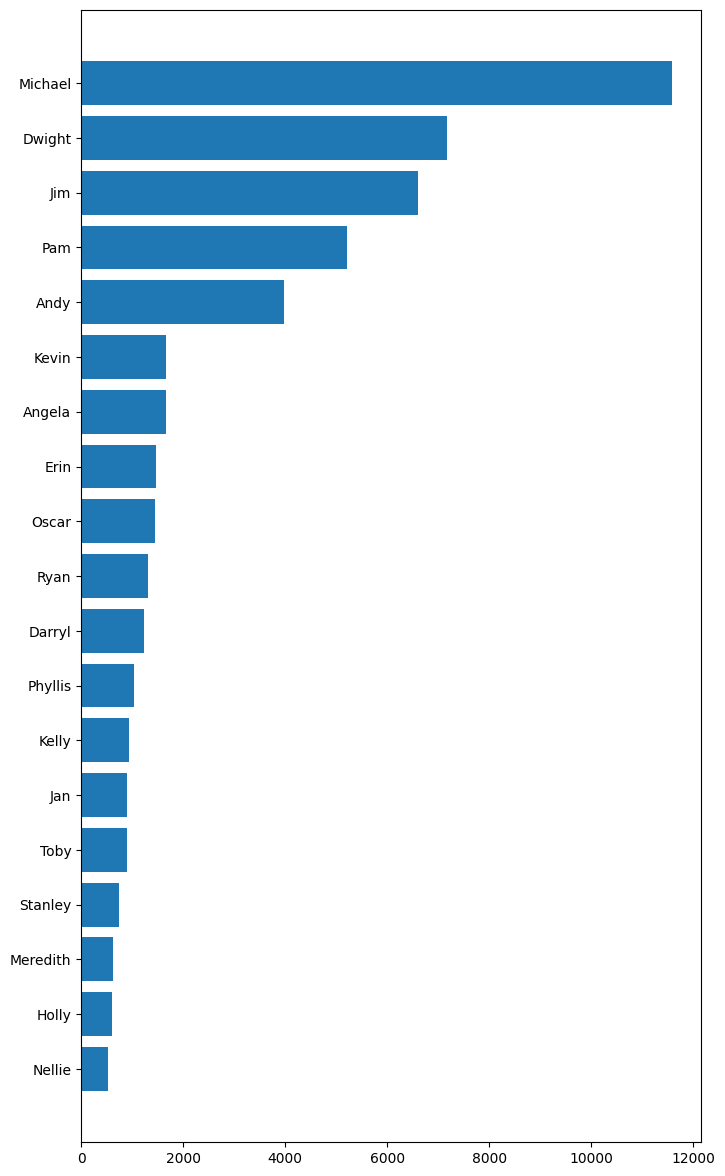

In [14]:
figure(figsize=(8,15), dpi=100)
plt.barh(range(len(imp_char_dict)), values, tick_label=names_char)
plt.yticks(fontsize=10)
# draw a horizontal histogram
plt.show()


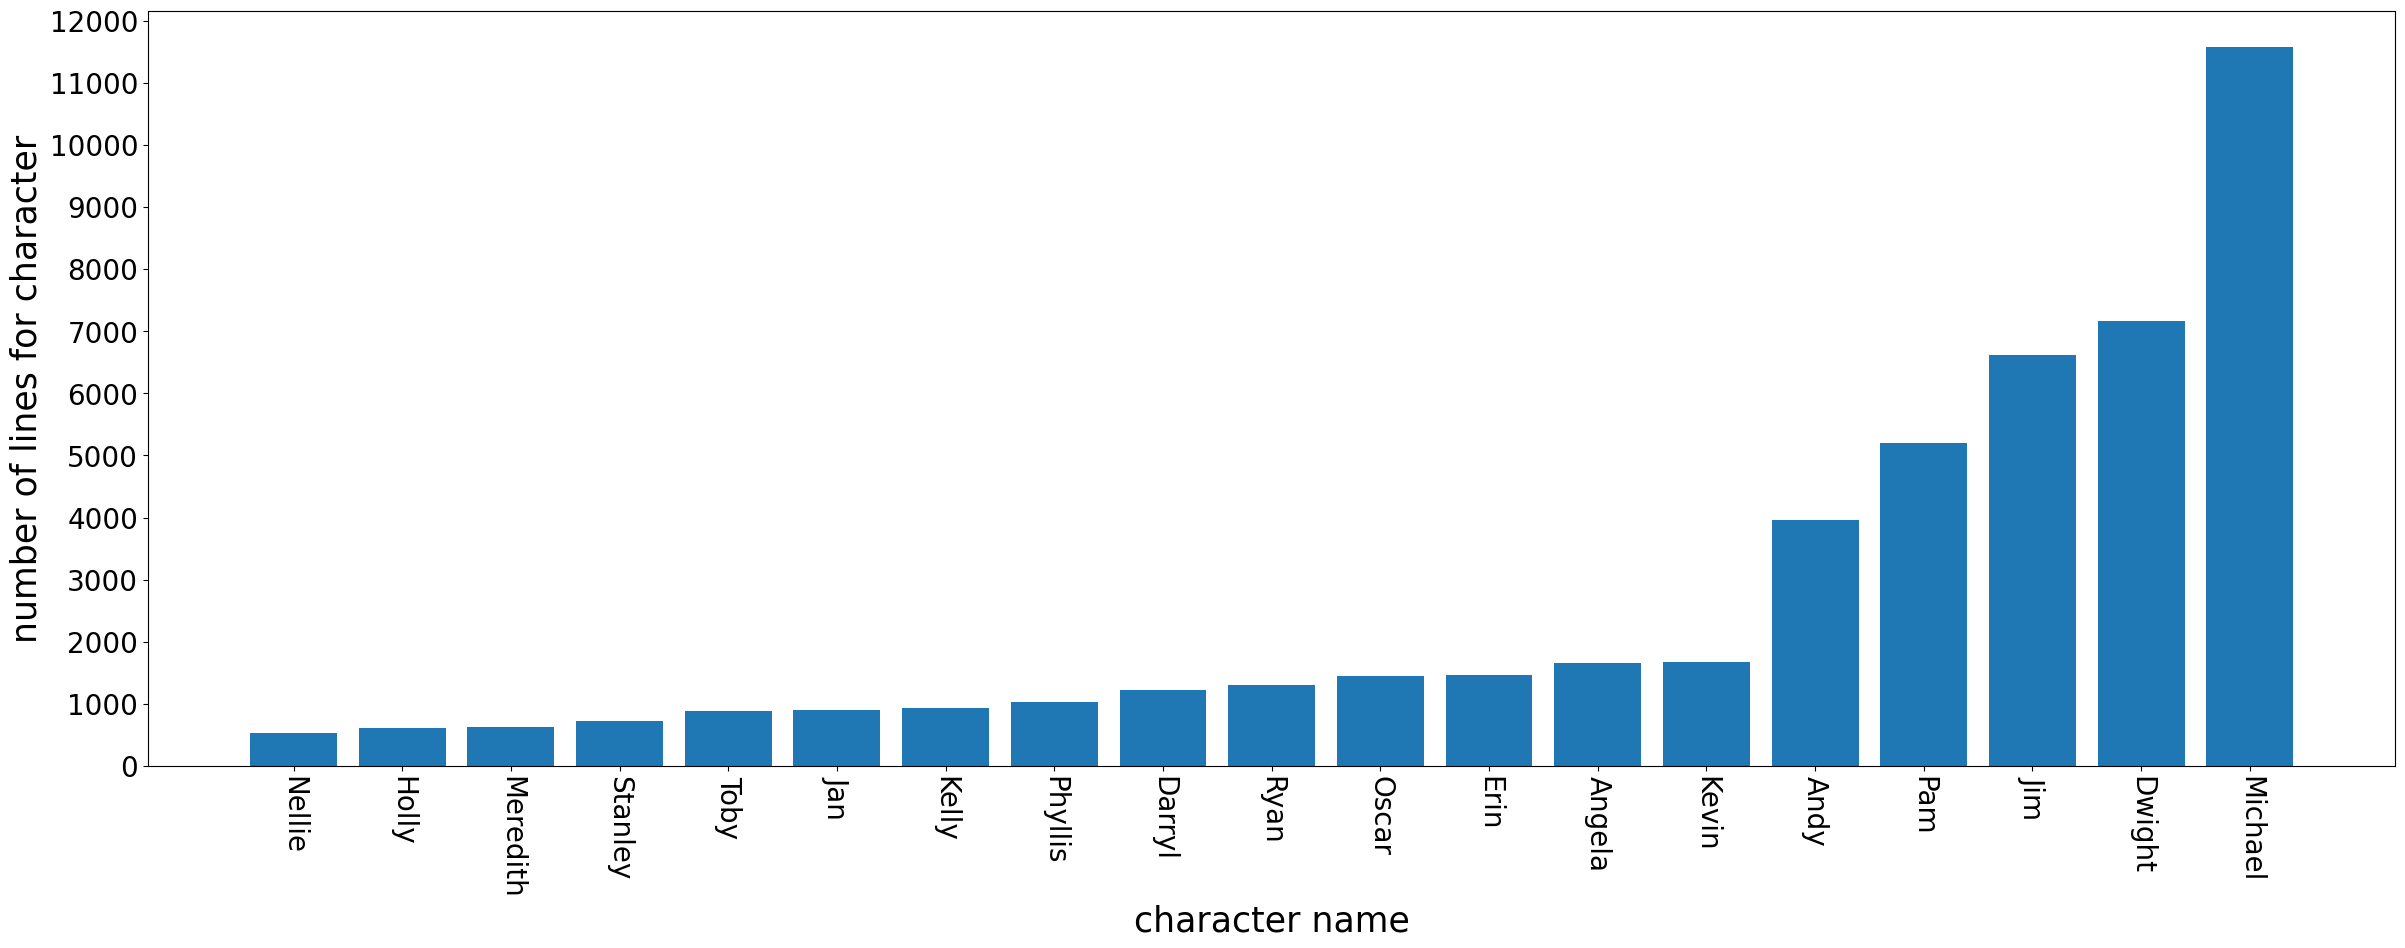

In [15]:
figure(figsize=(29, 10), dpi=100) 

plt.bar(range(len(imp_char_dict)), values, tick_label=names_char)
plt.xticks(fontsize=20, rotation=-90)
plt.yticks(range(0,13000,1000), fontsize=20)
plt.xlabel('character name', fontsize=25)
plt.ylabel('number of lines for character', fontsize=25)
# Set the x-axis label rotation angle
plt.show()
# bar graph for imp characters based on there number of lines

In [16]:
def ttl_words(char_name): #function for counting total laters spokrn by a character
    tes=df.loc[df['speaker']==char_name]['line_text']
    tes_ttl=''.join(tes)
    return len(tes_ttl)
    

Text(0, 0.5, 'word count of character')

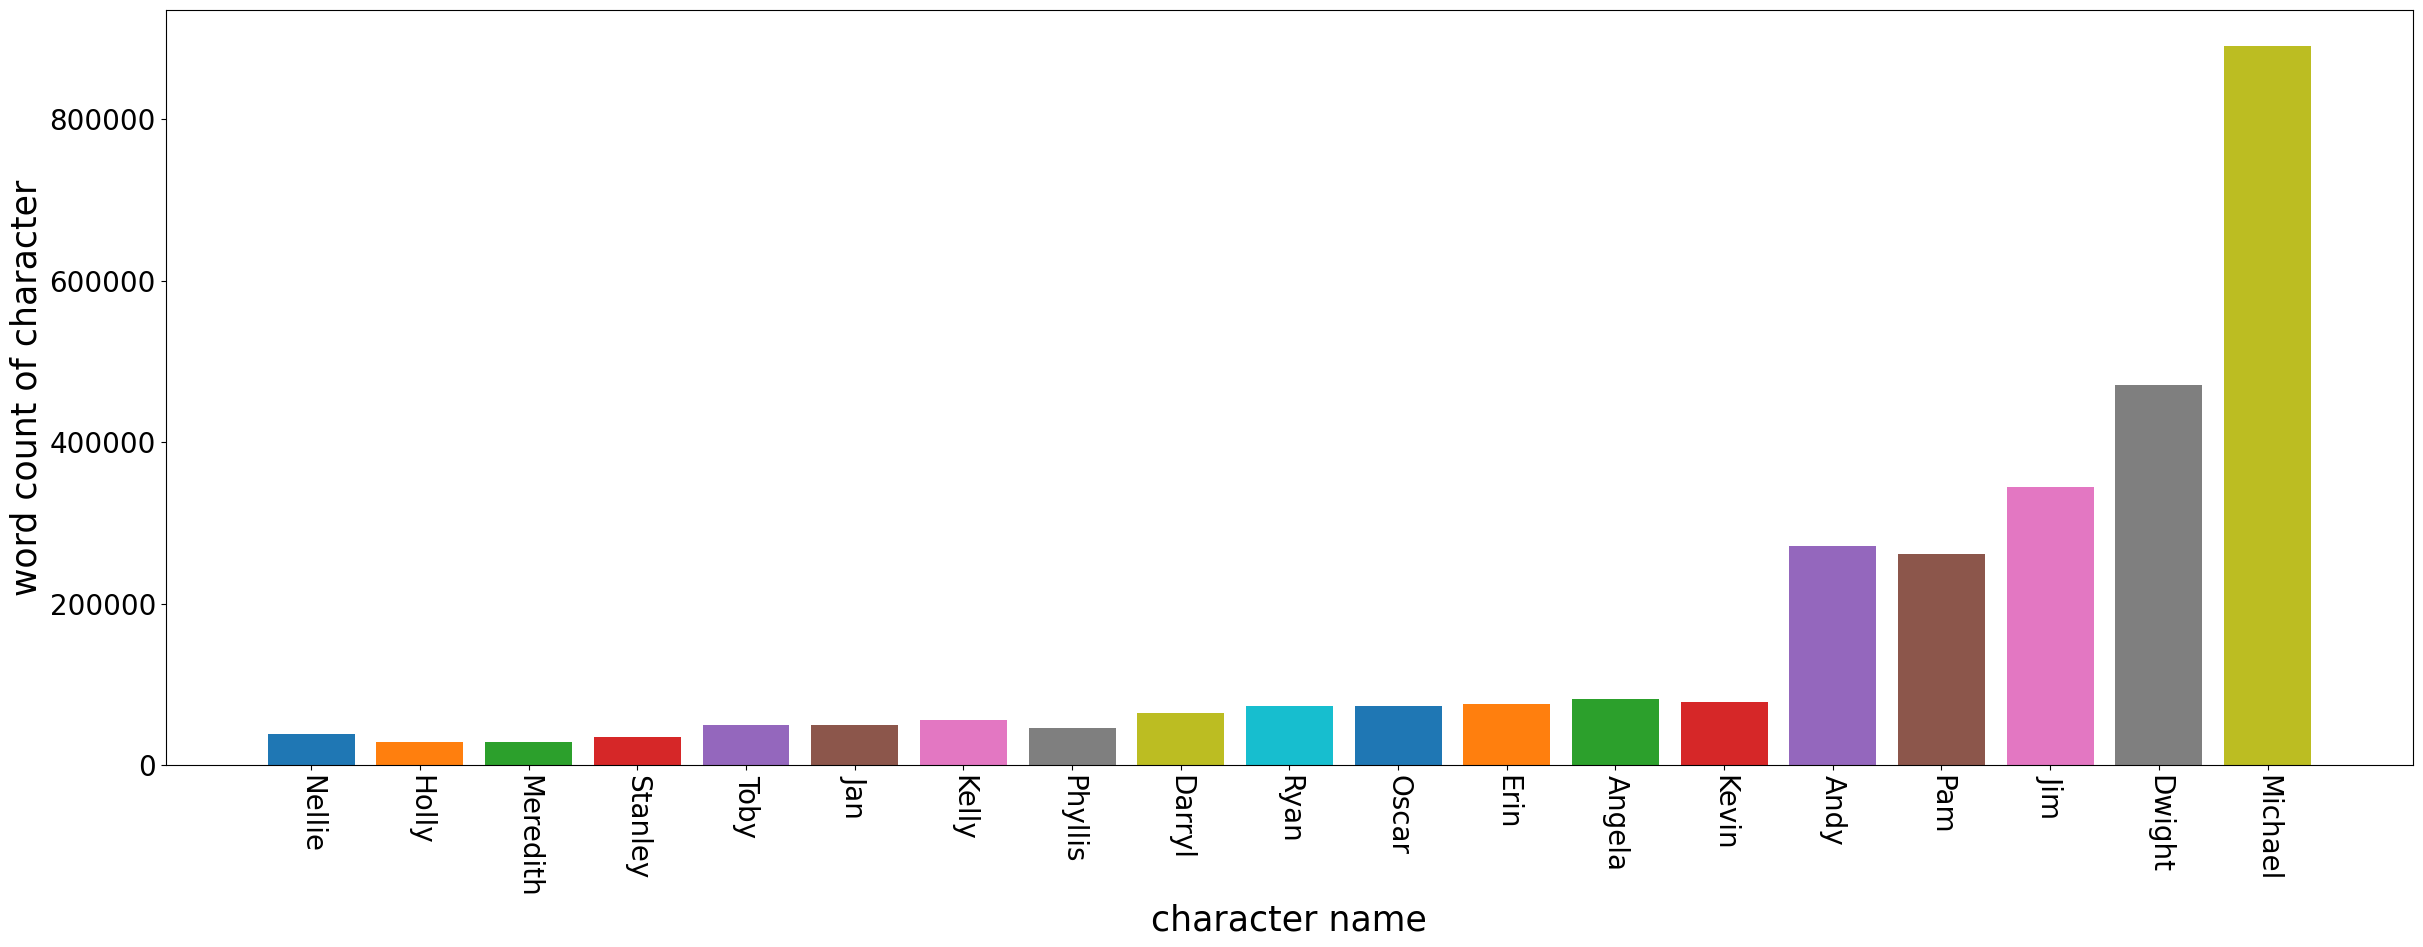

In [17]:
figure(figsize=(29, 10), dpi=100) 
for char in imp_char:
    
    plt.bar(char,ttl_words(char))
plt.xticks(fontsize=20, rotation=-90)
plt.yticks(fontsize=20)
plt.xlabel('character name', fontsize=25)
plt.ylabel('word count of character', fontsize=25)


finding number of scenes in each episode of each season
making graph of scene numbers in particular season


In [19]:
df.loc[(df['season']==1) &(df['episode']==1)]['scene'].max() #prototype to find number of scene in a single episode in a given season

39

In [20]:
def find_num_scene(season_num, episode_num):
    max=df.loc[(df['season']==season_num)&(df['episode']==episode_num)]['scene'].max()
    return max

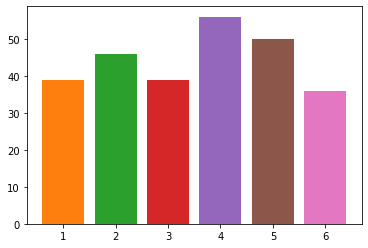

In [22]:
for i in range(len(df.loc[(df['season']==1)])):
    plt.bar(i,find_num_scene(1,i))

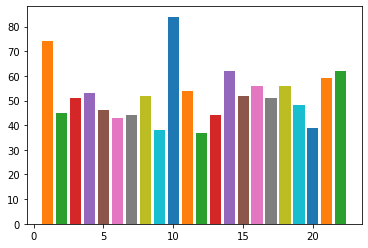

In [30]:
for i in range(len(df.loc[(df['season']==2)])):# bar graph for season 2 episode vs number of scenes
    plt.bar(i,find_num_scene(2,i))
    plt.xlabel('episode_number')
    plt.ylabel('number_of_scenes')

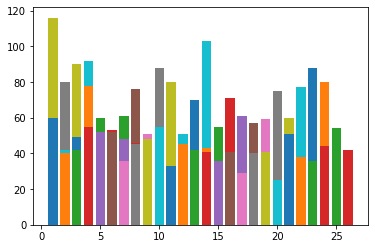

In [31]:
for j in range(9):
    for i in range(len(df.loc[(df['season']==j)])):
        plt.bar(i,find_num_scene(j,i))

In [31]:
x=list(set(df.loc[df['season']==1]['episode']))
y=[]
for episode in x:
    result=find_num_scene(1,episode)
    y.append(result)
#logic for making lists for line graph
      


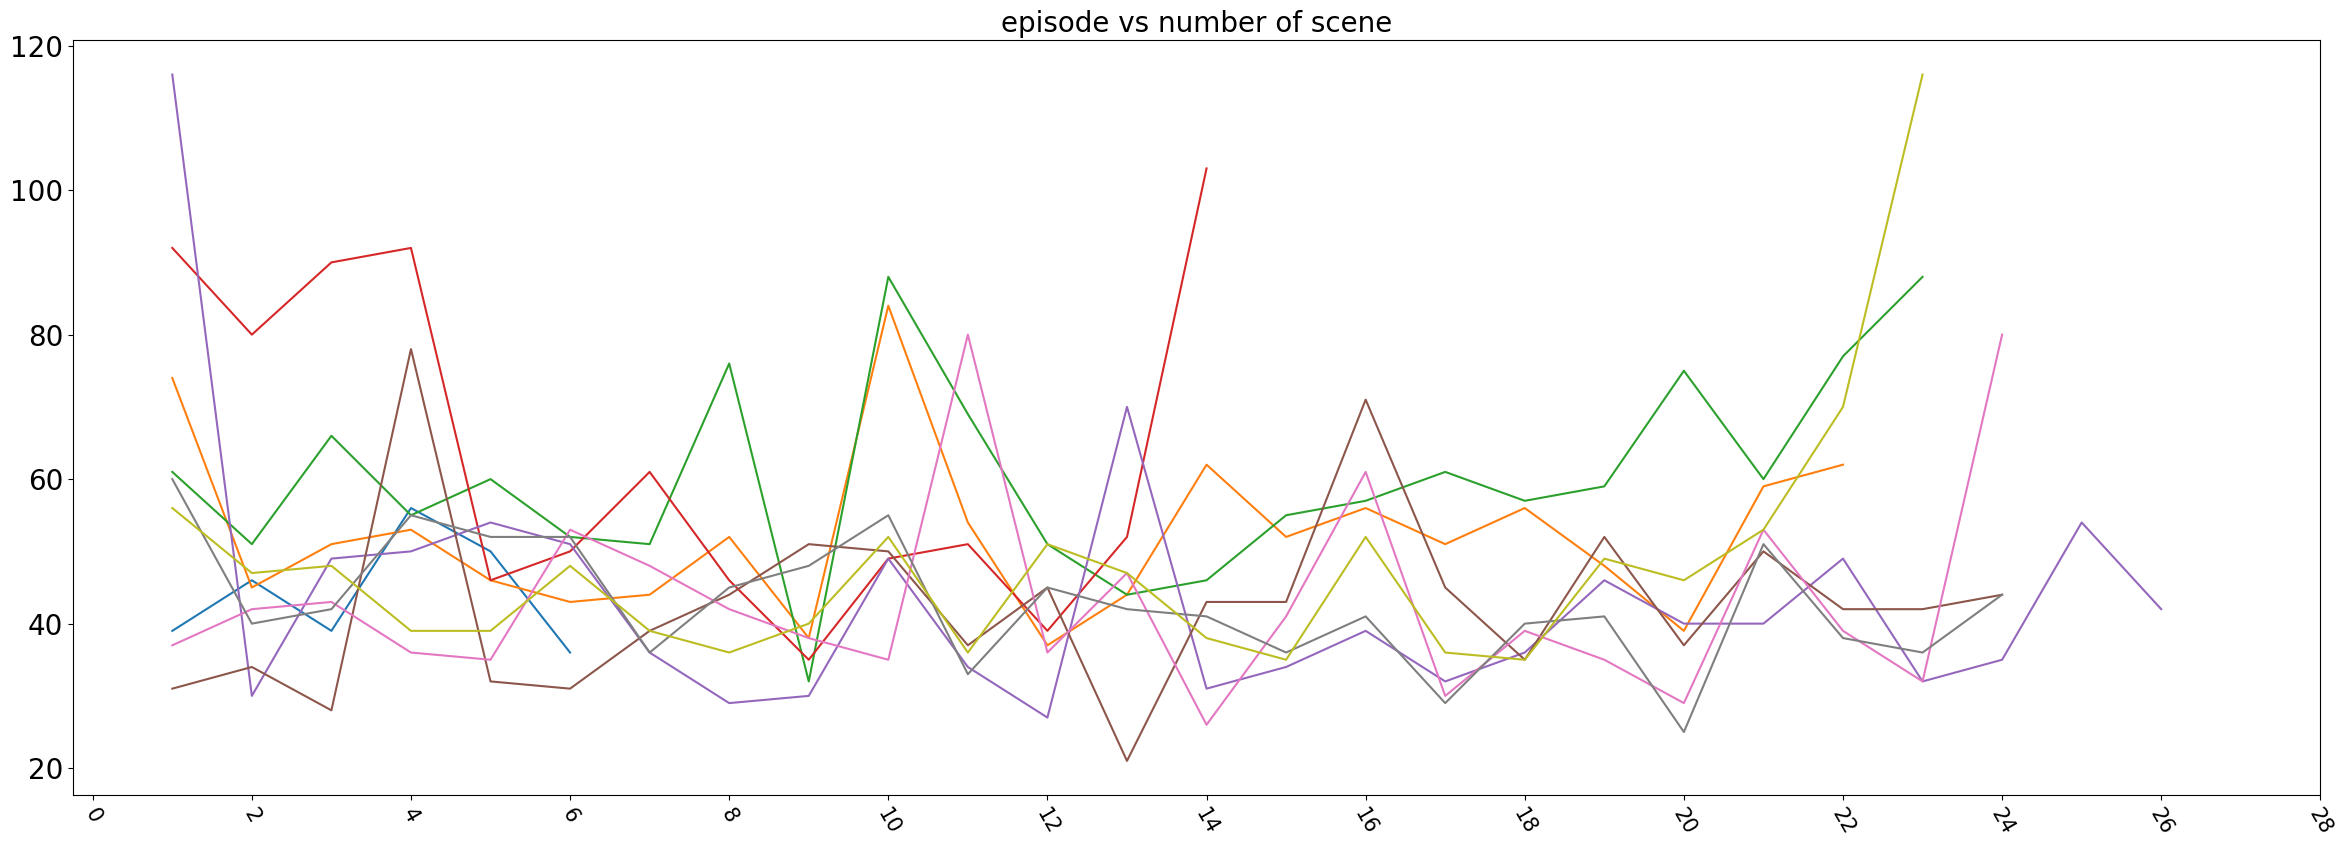

In [49]:
figure(figsize=(29, 10), dpi=100) 
for i in range(1,10):
    x=list(set(df.loc[df['season']==i]['episode']))
    y=[]
    for episode in x:
        result=find_num_scene(i,episode)
        y.append(result)
    plt.plot(x,y)
    plt.title('episode vs number of scene', fontsize=20)
    plt.xticks(range(0,30,2),fontsize=15, rotation=-60)
    plt.yticks(fontsize=20)
    i+=1
        